In [1]:
import pandas as pd
import numpy as np

from context import community_module
from community_module.community_detection.similarityCommunityDetection import SimilarityCommunityDetection
from community_module.community_detection.explainedCommunitiesDetection import ExplainedCommunitiesDetection
from community_module.visualization.gephiVisualization import GephiVisualization

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
interactions_df = pd.read_csv('../../data/IMMA/citizenInteractions.csv')
interactions_df.head()

,userResponseID,artworkID,numInteractions
0,81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,60c0927e0ee8234e932e7a1d,1
1,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c08c580ee8234e932e7a18,1
2,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c0908cb5b26479a17d1b33,1
3,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c09225b5b26479a17d1b3a,1
4,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c0927e0ee8234e932e7a1d,1


In [3]:
artworks = pd.read_json('../../data/IMMA/artworks_IMMA.json')
artworks

,_id,name,artist,date,description,notes,URL,image,audio,_datasetid,_timestamp,_timestamp_year,_timestamp_month,_timestamp_day,_timestamp_hour,_timestamp_minute,_timestamp_second,_updated
0,60c095321262e65eec197529,Back of Snowman,Gary Hume,2003,Gary Hume was one of a generation of artists w...,"IMMA Collection: Purchase, 2005",https://imma.ie/collection/back-of-snowman/,08GaryHume.jpg,08-BackSnowman-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482702,2021,7,28,15,31,42,True
1,60c094dcb78b241f4625bbb9,SENTINEL VIII,Catherine Lee,1999,"Born in Texas in 1950, Lee’s works are a hybri...","IMMA Collection: Donation, Sean Scully, 2005",https://imma.ie/collection/sentinel-viii/,07CatherineLee.jpg,07-Sentinel-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482652,2021,7,28,15,30,52,True
2,60c09476b84c4b312635d34c,Barrel,Fergus Martin,2020,"This artwork is by Fergus Martin, an Irish art...",Commissioned by the Office for Public Works fo...,,06FergusMartin.jpg,06-Barrel-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482593,2021,7,28,15,29,53,True
3,60c09437b5b26479a17d1b3c,217 5° Arc x 12,Bernar Venet,2008,"Born in 1941 in the south of France, Venet est...","IMMA Collection: Loan, collection of the artis...",https://imma.ie/collection/217-5-arc-x-12/,05BernarVenet.jpg,05-Arc-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482511,2021,7,28,15,28,31,True
4,60c0927e0ee8234e932e7a1d,The Drummer,Barry Flanagan,1996,"Born in Wales, Barry Flanagan studied at Birmi...","IMMA Collection: Donated by the artist, 2001",https://imma.ie/collection/the-drummer/,04BarryFlanagan.jpg,04-Drummer-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482440,2021,7,28,15,27,20,True
5,60c09225b5b26479a17d1b3a,8 Limestones cut to a specific size from rough...,Ulrich Rückriem,1988,Ulrich Rückreim is German and he lives in Colo...,"IMMA Collection: Purchase, 2001",https://imma.ie/collection/8-limestones-cut-to...,03UrichRuckreim.jpg,03-8Limestones-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482394,2021,7,28,15,26,34,True
6,60c0908cb5b26479a17d1b33,Untitled / Corrections D,Iran do Espírito Santo,2008,<p>Brazilian artist Iran do Espírito Santo’s w...,"IMMA Collection: Purchase, 2007",https://imma.ie/collection/untitled-correction...,02IrandoEspiritoSanto.jpg,02-UntitledCorrectionsD-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482302,2021,7,28,15,25,2,True
7,60c08c580ee8234e932e7a18,Recurring Line: North/ South,Donald Urquhart,2007,<p>Scottish artist Donald Urquhart works in a ...,"IMMA Collection: Purchase, 2005",https://imma.ie/collection/recurring-line-nort...,01DonaldUrquhart.jpg,01-RecurringLine-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627481698,2021,7,28,15,14,58,True


In [4]:
def get_name(artwork_id):
    return artworks['_id'] 

names_arts = interactions_df.apply(lambda row: artworks[artworks['_id'] == row['artworkID']].name.values[0], axis=1)

In [5]:
names_arts

0                                           The Drummer
1                          Recurring Line: North/ South
2                              Untitled / Corrections D
3     8 Limestones cut to a specific size from rough...
4                                           The Drummer
5                                       217 5° Arc x 12
6                                                Barrel
7                                         SENTINEL VIII
8                                       Back of Snowman
9                              Untitled / Corrections D
10    8 Limestones cut to a specific size from rough...
11                                          The Drummer
12                                        SENTINEL VIII
13                                          The Drummer
14                                               Barrel
15                                      Back of Snowman
16                         Recurring Line: North/ South
17                             Untitled / Correc

In [6]:
interactions_df['artworkID'] = names_arts

In [7]:
interactions_df

,userResponseID,artworkID,numInteractions
0,81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,The Drummer,1
1,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Recurring Line: North/ South,1
2,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Untitled / Corrections D,1
3,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,8 Limestones cut to a specific size from rough...,1
4,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,The Drummer,1
5,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,217 5° Arc x 12,1
6,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Barrel,1
7,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,SENTINEL VIII,1
8,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Back of Snowman,1
9,KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,Untitled / Corrections D,3


In [8]:
users_interactions = pd.pivot_table(interactions_df, values='numInteractions', index='userResponseID', columns='artworkID', fill_value=0)
users_interactions.head()

artworkID,217 5° Arc x 12,8 Limestones cut to a specific size from rough blocks 150 x 50 x 50cm split into parts and reassembled into their original form,Back of Snowman,Barrel,Recurring Line: North/ South,SENTINEL VIII,The Drummer,Untitled / Corrections D
userResponseID,,,,,,,,
81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,0,0,0,0,0,0,1,0
BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,1,1,1,1,1,1,1,1
KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,0,3,0,0,0,1,3,3
P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1,0,0,0,1,0,0,1,0
SUw10XRrB4A03Ral1MKas4sLgIW9P3lh,0,0,1,0,0,0,0,0


In [9]:
from community_module.community_detection.opticsCommunityDetection import OpticsCommunityDetection

similarityMatrix = cosine_similarity(users_interactions)

# print(similarityMatrix)
distanceMatrix = np.copy(similarityMatrix)
distanceMatrix *= -1/len(distanceMatrix)
distanceMatrix += 1/len(distanceMatrix)



community_dectection = ExplainedCommunitiesDetection(users_interactions, OpticsCommunityDetection, 'cosine')
# print(users_interactions)
o = OpticsCommunityDetection(users_interactions)
s = SimilarityCommunityDetection(users_interactions)
print(s.calculate_communities())
print(o.calculate_communities(distanceMatrix))

{'81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO': 0, 'BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S': 0, 'KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I': 0, 'P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1': 0, 'SUw10XRrB4A03Ral1MKas4sLgIW9P3lh': 0, 'ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA': 0, 'ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F': 0, 'aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY': 0, 'iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4': 1, 'k5SXzdwN9UPY2FXUC1vavDtk3CykTKXR': 0, 'r6ojHpr4LeGQQcGcSXFGsFQVJzdGYwzE': 0}
{'81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO': 0, 'BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S': 0, 'KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I': 1, 'P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1': 1, 'SUw10XRrB4A03Ral1MKas4sLgIW9P3lh': 1, 'ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA': 1, 'ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F': 1, 'aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY': 2, 'iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4': 2, 'k5SXzdwN9UPY2FXUC1vavDtk3CykTKXR': -1, 'r6ojHpr4LeGQQcGcSXFGsFQVJzdGYwzE': -1}



-labels:
 [ 0  0  0  1  1  1  2  2  3  3 -1]

-reachability:
 [        inf  1.01308615  1.42602131  1.55726607  1.41421356  2.15380003
  3.3936575   1.36516755  5.19592127  4.15308082 11.59944083]

-core_distances:
 [ 1.01308615  1.01308615  1.42602131  1.41421356  1.41421356  2.15380003
  1.36516755  1.36516755  4.15308082  4.15308082 11.59944083]

-n_features_in:
 11


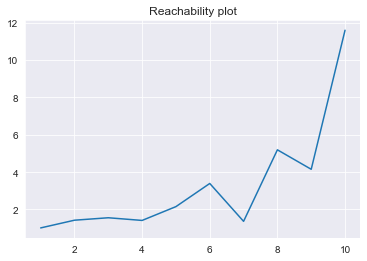

In [363]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt


optics_model = OPTICS(min_samples = 2, min_cluster_size = 2, max_eps = 66, xi = .05)
optics_model.fit(users_interactions)
1
reachability = optics_model.reachability_[optics_model.ordering_]

labels = optics_model.labels_[optics_model.ordering_]

print("\n-labels:\n", labels)
print("\n-reachability:\n", reachability)
print("\n-core_distances:\n", optics_model.core_distances_[optics_model.ordering_])
print("\n-n_features_in:\n", optics_model.n_features_in_)

# Generate reachability plot
reachability = optics_model.reachability_[optics_model.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

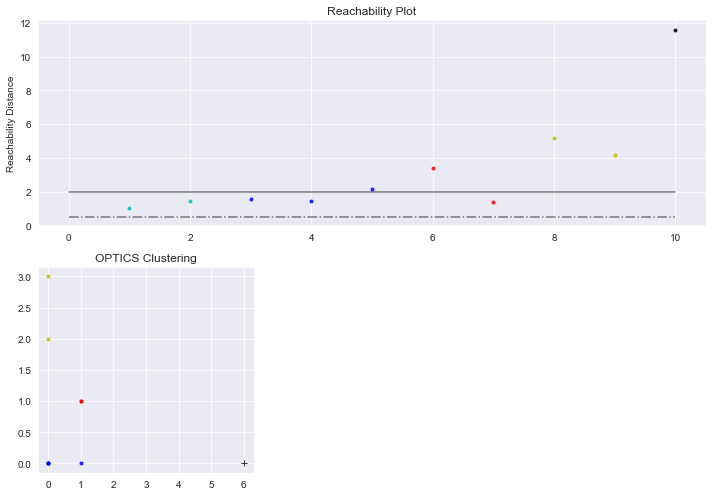

In [364]:
from matplotlib import gridspec

space = np.arange(len(users_interactions))

# Defining the framework of the visualization
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.8)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.8)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')

# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = users_interactions[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.8)

ax2.plot(users_interactions.iloc[optics_model.labels_ == -1, 0],
        users_interactions.iloc[optics_model.labels_ == -1, 1],
       'k+', alpha = 0.8)
ax2.set_title('OPTICS Clustering')

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

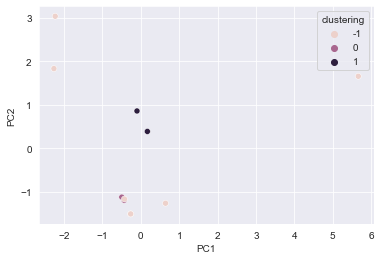

In [328]:
from sklearn.cluster import OPTICS
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

df = users_interactions

pca = PCA()
pca.fit(df)
df['PC1'] = pca.fit_transform(df)[:,0]
df['PC2'] = pca.fit_transform(df)[:,1]
df['clustering'] = optics_model.labels_
sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['clustering'])